In [453]:
import numpy as np
from sklearn.cluster import KMeans
import csv 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage
from sklearn.preprocessing import Imputer
import math

In [454]:
training_data = pd.read_csv("data_set.csv", index_col=0).as_matrix() + 1 # add one smoothing
training_labels = pd.read_csv("data_set.csv", usecols=[0]).as_matrix()

In [455]:
# Use principal component to reduce dimensions of data onto a single plane
pca = PCA(n_components=2, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
X_pca = pca.fit_transform(training_data)

# perform k-means clustering on the data to classify them into distinct groupings
number_clusters = 5
kmeans = KMeans(n_clusters=number_clusters, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto').fit(X_pca)

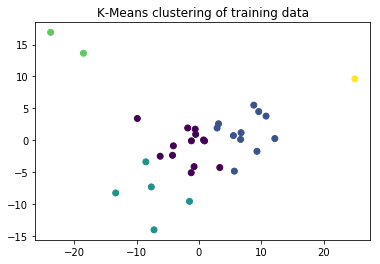

In [456]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_.astype(float))
plt.title("K-Means clustering of training data");

In [457]:
cluster_labels = kmeans.labels_

dict_area_clusters = {}
for i in range (0, number_clusters):
    dict_area_clusters[i] = []
    
# add the location labels to a dictionary entry for its cluster along with the average of its columns
for i in range (0, (len(cluster_labels))):
    dict_area_clusters[cluster_labels[i]].append([training_labels[i][0], np.sum(training_data[i])/len(training_data[i])])
    
# print names of location in each cluster and the average of each cluster
for key, value in dict_area_clusters.items():
    print(key)
    sum = 0
    for i in range(0,len(value)):
        sum = sum + value[i][1]
        print(value[i][0])
    print("%.2f" % (sum/len(value)))
    print()

0
Angus
Argyll and Bute
City of Edinburgh
Dumfries and Galloway
East Ayrshire
Highland
Na h-Eileanan Siar
Orkney Islands
Perth and Kinross
Renfrewshire
South Lanarkshire
Stirling
West Lothian
20.34

1
Aberdeen City
Clackmannanshire
Dundee City
Falkirk
Fife
Inverclyde
North Ayrshire
North Lanarkshire
Scottish Borders
South Ayrshire
West Dunbartonshire
23.54

2
Aberdeenshire
East Lothian
Midlothian
Moray
Shetland Islands
18.78

3
East Dunbartonshire
East Renfrewshire
13.40

4
Glasgow City
29.15



In [458]:
# get data with empty columns to predict clusterings
test_data = pd.read_csv("test_data.csv", index_col=0).as_matrix() + 1 # add one smoothing
labels = pd.read_csv("test_data.csv", usecols=[0]).as_matrix()

In [459]:
def sc(train, test_row, column):
    similarity = []
    for i in range (0,len(train)-1):
        mean_x = np.mean(train[i])
        mean_y = np.mean(test_row)
        similarity.append(1/(1+r(mean_x, mean_y)))
    sim_prod = []
    for i in range (0,len(train)):
        sim_prod.append(similarity*column[i])
    return (1/(np.sum(similarty))*np.sum(sim_prod))
            
def r(mean_x, mean_y):
    return (1/(1+(mean_x-mean_y)**2))

In [460]:
# make predictions on test data

for i in range(0, len(test_data)):
    for j in range(0,len(test_data[i])):
        if(math.isnan(test_data[i][j])):
            test_data[i][j] = sc(training_data, test_data[i][j], np.transpose(training_data)[j])

    
Y_pca = pca.fit_transform(test_data)
test_group = kmeans.predict(Y_pca)
test_group 

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [ ]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_.astype(float))
plt.scatter(Y_pca[:,0], Y_pca[:,1], marker='*', c=test_group.astype(float))
plt.title("Test data cluster visualisation");